# Pythonを使ったロジスティック回帰の実装
---

### 目的関数と最適化手法
- 目的関数：達成したい目的を表した関数。
- 最適化手法：目的を達成するための方法。  

２つの問題に分けるとアルゴリズムが考えやすが、  
必ずしも２つに分解しなければならないわけではない。

#### オンライン学習
オンライン学習とは、データを与えられるたびに逐次的に学習を行うこと。  
データは１つずつ与え、N回で終了するのではなく、何度も繰り返しデータを与える。

### 確率的勾配降下法
目的関数の最小化を目的とする場合に用いる勾配法（最適化手法）の一種。
#### 1. 勾配法  
パラメータ $w$ を引数としてとる目的関数 $L(w)$ の値を最小化するための手法。  
すり鉢状の土地を下に向かって歩いていけば、最後には一番下にたどり着くというイメージ。
#### 2. 勾配降下法  
目的関数 $L(w)$ , $i$番目のデータを $(x^{(i)}, y^{(i)})$としたとき、次のように表す。

$$ L\,(w) = \sum_i l\,(x^{(i)}, y^{(i)}, w) $$

分類に成功したら０、間違えたら分離超平面までの距離をその値とするような関数を考える。  

$$ l(x^{(i)}, y^{(i)}, w) = max( -y^{(i)}w^Tx^{(i)}, 0 ) $$

全て分類できれば $L(w)$ は０をとり、間違いが多くなるとその値が大きくなることになる。  
また、目的関数が収束するまで、次式を用いてパラメータ更新を行う。

$$ w^{(t+1)} = w^{t} - \eta^{(t)}\nabla L(w) $$

収束の判定は、 目的関数の値の変化度合いがよく用いられる。  
なんらかの正の実数$\epsilon$を設定し、以下のように表せる。

$$ |\,L\,(w^{(t+1)}- L\,(w^{(t)})\,| < \epsilon $$

#### 3. 確率的勾配降下法  
勾配降下法の問題点は、  
一度のパラメータ更新に、全てのデータを使って計算をし直すため、計算コストが高いこと。  
そこで確率的勾配降下法では、**１つのデータを読み込んだら、そのデータのみを使って勾配を計算し、パラメータを更新する。**  
パラメータ更新は、全てのデータに対して行う。また、パラメータ更新の式は以下のようになる。

$$ w^{(t+1)} = w^{t} - \eta^{(t)}\nabla  l(x^{(t)}, y^{(t)}, w^{(t)}) $$

勾配をより上手く近似する手法として、ミニバッチやモーメンタム法がある。

### 正則化について
正則化には、過学習を防ぐ効果がある。  
今まで、損失項と正則化項の和を目的関数とし、最小化をしてきた。
- L1正則化　特定のデータの重みを0にする事で、不要なデータを削除する。
- L2正則化　データの大きさに応じて0に近づけて、滑らかなモデルとする。  
$\lambda$は、正則化パラメータ。$q=1$のとき、L1正則化。$q=2$のとき、L2正則化。

$$ \frac{\lambda}{2}||\,w\,||^2 = \frac{\lambda}{2}\sum_{j=1}^m |\,w_j|\,^q $$

- それぞれの正則化にはいろいろ問題があって、**Elastic Net**というモデルもある。

$$ \frac{\lambda}{2}\sum_{j=1}^m ( \, \alpha|\,w_j|\,^q + (1-\alpha)|\,w_j|\,^2) $$

### ロジスティック回帰
ロジスティック回帰の特徴は、出力が確率の制約を満たすこと。（２つのクラスの出力の和が１なるということ）  
ここでは、+1, -1に分類することを考える。  

データ$x$のとき、出力が$y$である確率は以下のように表せる。
$$ P(\,y\,|\,x\,) = \frac{1}{1+\exp(-yw^Tx)} = \sigma(\, yw^Tx \,) $$
$-yw^Tx$ が大きいほど、$y$ が１である確率が高くなる。  
以上の式より、ロジスティック回帰の目的関数は次式となる。  

$$ \prod_{t=1,2,...}P(\,y^{(t)}\,|\,x^{(t)}\,) = \prod_{t=1,2,...}\sigma(\, y^{(t)}w^Tx^{(t)} \,) = \prod_{t=1,2,...}\frac{1}{1+\exp(\, y^{(t)}w^Tx^{(t)} \,)} $$

この式を**尤度**または**尤度関数**という。このままでは、$exp$の部分がオーバーフローする可能性がある。  
そこで、この式の対数をとる。これを**対数尤度**という。

$$ \log\prod_{t=1,2,...}\sigma(\, y^{(t)}w^Tx^{(t)} \,) = \sum_{t=1,2,...}\log\Bigr(\frac{1}{1+\exp(\, y^{(t)}w^Tx^{(t)} \,)}\Bigr) $$

対数を取ることで、右辺が $\sum$ になったため確率的勾配降下法を用いることができる。

#### ロジスティック回帰のパラメータ推定
実際には、上記の式でパラメータ推定をすると数値的に不安定になる場合がある。  
なので、目的関数にL1正則化もしくはL2正則化を付加したものがよく使われる。  

また、最適化では最小化を目的とするので、式に$-1$をかけて符号を逆転させる。さらに、L2正則化をつけると、次のようになる。

$$ min_w\,L(\,w\,) = - \sum_{t=1,2,...}\log\Bigr(\frac{1}{1+\exp(\, -y^{(t)}w^Tx^{(t)} \,)}\Bigr) + C\,||\,w\,||^2 $$

目的関数 $l(w)$ を次のように定義する。

$$ l(w) = -\log\Bigr(\frac{1}{1+\exp(\, -y^{(t)}w^Tx^{(t)} \,)}\Bigr) $$

$l(w)$ を$w$の$k$次元目となるような$w_k$で偏微分をし、標準シグモイド関数$\sigma$を使って表すと

$$ \frac{\sigma l(w)}{\sigma w_k} = (1- \sigma (yw^Tx))(-yx_k) $$

これに正則化項を加えると、

$$ (1- \sigma (yw^Tx))(-yx_k) + 2C_W $$

最終的には、以下の式を損失関数と定義し、最適化する。

$$ -\log\Bigr(\frac{1}{1+\exp(\, -y^{(t)}w^Tx^{(t)} \,)}\Bigr) $$

ちなみに、SVMの場合は $ max(1 - y^{(t)}w^Tx^{(t)}, 0) $  を用いる。  
SVMに使われているヒンジ損失は、重みを０にできるから多次元のデータのにも強い？

![損失関数のグラフ](./data/images/loss_fanc.png)

## ロジスティック回帰の実装
---

- 確率的勾配法の実装

In [1]:
import time
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 勾配降下法
---
- 計算量が多い。今回はデータが100行しかないため、計算が終わっているだけ。

In [2]:
originPoint = np.array([0, 0])
data = np.array([[np.random.randint(100), np.random.randint(100), None] for _ in range(100)])

threshold = 70
label = np.array([int(threshold >= np.linalg.norm(d[:2]-originPoint)) for d in data])
data[:, 2] = label

In [3]:
def sigmoid(t):
    return( 1 / (1 + np.exp( -t )) )

In [4]:
def CostFunction(W, X, y):
    m = len(y)
    h = sigmoid(X.dot(W).astype(int))
    j = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    return j

In [5]:
X = np.c_[np.ones((data.shape[0],1)), data[:, :2]]
y = np.c_[data[:,2]]

initial_theta = np.zeros(X.shape[1])
CostFunction(initial_theta, X, y)

array([0.693147180559945], dtype=object)

In [6]:
def gradient_decent (theta, X, y, alpha = 0.001, num_iters = 100000):
    m = len(y)
    history = np.zeros(num_iters)

    for inter in np.arange(num_iters):
        h = sigmoid(X.dot(theta).astype(int))
        theta = theta - alpha *(1/m)*(X.T.dot(h-y))
        history[inter] = CostFunction(theta,X,y)

    return(theta, history)

In [7]:
# %%timeit

start = time.time()

initial_theta = np.zeros(X.shape[1])
theta = initial_theta.reshape(-1,1)
cost = CostFunction(initial_theta, X, y)
theta, Cost_h= gradient_decent(theta, X, y)

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:13.784262895584106[sec]


[[5.973361043928027]
 [-0.06958982218071996]
 [-0.08028613453759577]]


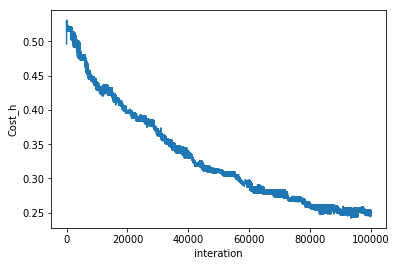

In [8]:
print(theta)
plt.plot(Cost_h)
plt.ylabel('Cost_h')
plt.xlabel('interation')
plt.show()

In [9]:
def predict(theta, X, threshold = 0.5):
    p = sigmoid(X.dot(theta).astype(int)) >= threshold
    return(p.astype('int'))

originPoint = np.array([0, 0])
data = np.array([[np.random.randint(100), np.random.randint(100), None] for _ in range(100)])

threshold = 70
label = np.array([int(threshold >= np.linalg.norm(d[:2]-originPoint)) for d in data])
data[:, 2] = label

x = data[:, :2]
X = np.c_[np.ones((x.shape[0])), x]
y = data[:, 2]

p = predict(theta,X)
y = y.astype('int')

accuracy_cnt = [(p[i] == y[i]) for i in range(100)]
print( sum(accuracy_cnt)/len(y) )

[0.91]


### 確率的勾配降下法(Stochastic Gradient Descent, SGD)
---
- 勾配降下法に比べて、損失の上下が激しくなる。(グラフは取得する損失の数を少なくしている。)
- 計算時間は勾配降下法に比べ、約1/6になっている
- 学習が安定しない。学習回数を多くしないと学習データの影響を強く受ける。

In [10]:
originPoint = np.array([0, 0])
data = np.array([[np.random.randint(100), np.random.randint(100), None] for _ in range(100)])

threshold = 70
label = np.array([int(threshold >= np.linalg.norm(d[:2]-originPoint)) for d in data])
data[:, 2] = label

In [11]:
def sigmoid(z):
    return( 1 / (1 + np.exp( -z )) )

In [12]:
def CostFunction(W, X, y):
    h = sigmoid(X.dot(W))
    j = -1*(np.log(h)*(y)+np.log(1-h)*(1-y))
    return j

In [13]:
X = np.c_[np.ones((data.shape[0],1)), data[:, :2]]
y = np.c_[data[:,2]]

initial_theta = np.zeros(X.shape[1])
CostFunction(initial_theta, X[0], y[0])

array([0.6931471805599453], dtype=object)

In [14]:
def gradient_decent(W, X, y, lr = 0.001, num_iters=1000000):
    history = np.array([])
    data_size = len(y)
    
    for t in range(num_iters):
        i = t%data_size
        h = sigmoid(X[i].dot(W))
        W = W - lr *np.array(X[i] * (h-y[i]))
        if i==0:
            history = np.append(history, CostFunction(W, X[i], y[i]))
    return (W, history)

In [15]:
# %%timeit

start = time.time()

initial_theta = np.zeros(X.shape[1])
W, Cost_h= gradient_decent(initial_theta, X, y)

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:17.587138175964355[sec]


[16.72175948477757 -0.21720562981258518 -0.2505719463048586]


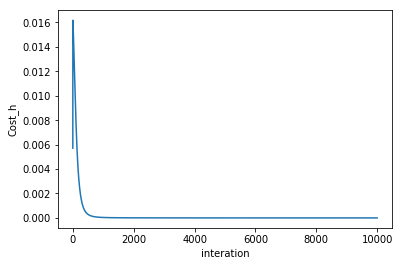

In [16]:
print(W)
plt.plot(Cost_h[:10000])
plt.ylabel('Cost_h')
plt.xlabel('interation')
plt.show()

In [17]:
def predict(W, X, threshold = 0.5):
    p = sigmoid(X.dot(W).astype(int)) >= threshold
    return(p.astype('int'))

originPoint = np.array([0, 0])
data = np.array([[np.random.randint(100), np.random.randint(100), None] for _ in range(100)])

threshold = 70
label = np.array([int(threshold >= np.linalg.norm(d[:2]-originPoint)) for d in data])
data[:, 2] = label

x = data[:, :2]
X = np.c_[np.ones((x.shape[0])), x]
y = data[:, 2]

p = predict(W, X)
y = y.astype('int')

accuracy_cnt = [(p[i] == y[i]) for i in range(100)]
print( sum(accuracy_cnt)/len(y) )

0.94


### 確率的勾配降下法 + ミニバッチ
---

In [18]:
originPoint = np.array([0, 0])
data = np.array([[np.random.randint(100), np.random.randint(100), None] for _ in range(100)])

threshold = 70
label = np.array([int(threshold >= np.linalg.norm(d[:2]-originPoint)) for d in data])
data[:, 2] = label

In [19]:
def sigmoid(z):
    return( 1 / (1 + np.exp( -z )) )

def CostFunction(W, X, y):
    m = len(y)
    h = sigmoid(X.dot(W).astype(int))
    cost = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    return cost

In [20]:
X = np.c_[np.ones((data.shape[0],1)), data[:, :2]]
y = data[:,2]

initial_theta = np.zeros(X.shape[1])
CostFunction(initial_theta, X[:10], y[:10])

0.6931471805599454

In [21]:
def gradient_decent(W, X, y, lr = 0.001, num_iters=100000, num_batch=10):
    history = np.array([])
    data_size = len(y)
    
    num_loop = int(num_iters / (data_size/num_batch))
    
    for _ in range(num_loop):
        for t in range(0, data_size, num_batch):
            i = t%data_size
            h = sigmoid(X[i:i+num_batch].dot(W).astype(int))
            W = W - lr *(1/num_batch)*np.array(X[i:i+num_batch].T.dot(h-y[i:i+num_batch]))
            if i%100==0:
                history = np.append(history, CostFunction(W, X[i:i+num_batch], y[i:i+num_batch]))
    
    return (W, history)

In [22]:
start = time.time()

initial_theta = np.zeros(X.shape[1])
W, Cost_h= gradient_decent(initial_theta, X, y)

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:2.476120948791504[sec]


[5.885051784638906 -0.06425915844687888 -0.06547803556871257]


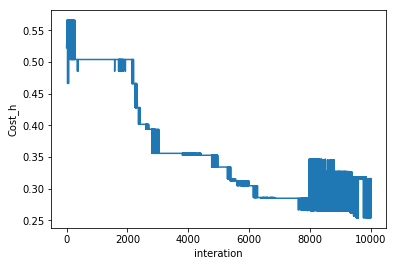

In [23]:
print(W)
plt.plot(Cost_h)
plt.ylabel('Cost_h')
plt.xlabel('interation')
plt.show()

In [24]:
def predict(W, X, threshold = 0.5):
    p = sigmoid(X.dot(W).astype(int)) >= threshold
    return(p.astype('int'))

originPoint = np.array([0, 0])
data = np.array([[np.random.randint(100), np.random.randint(100), None] for _ in range(100)])

threshold = 70
label = np.array([int(threshold >= np.linalg.norm(d[:2]-originPoint)) for d in data])
data[:, 2] = label

x = data[:, :2]
X = np.c_[np.ones((x.shape[0])), x]
y = data[:, 2]

p = predict(W, X)
y = y.astype('int')

accuracy_cnt = [(p[i] == y[i]) for i in range(100)]
print( sum(accuracy_cnt)/len(y) )

0.84


## ロジスティック回帰の他クラス分類への応用
---
### 多クラス分類
- １対他法  
クラス数と同じ数の分類器を用意。
- １対１法  
全てのクラスの組み合わせの分類器を用意。全ての分類器で投票を行い、一番票の多いクラスに分類。  
１対他法よりも少し精度が良いことが実験的に知られているが、クラス数の２乗に比例する計算時間がかかる欠点がある。
- 誤り訂正出力符号法（ECOC法）  
あらかじめ決められた数の分類器を用意。分類器の数を$n$、クラス数を$K$としたとき、以下のようなテーブルを得られる。 

|  | $f_1$ | $f_2$ | $f_3$ |
|:---:|:---:|:---:|:---:|
|クラス1| 0 | 0 | 0 |
|クラス2| 0 | 1 | 1 |
|クラス3| 1 | 0 | 1 |
|クラス4| 1 | 1 | 0 |

各分類器で出力された値を並べたものを**コードワード**という。  
このコードワードをつかって、ハミング距離が最も近いクラスに分類する。　　

ハミング距離とは、桁数が同じ2つの2進数を比較して、異なっている桁の個数をいう。  

ハミング距離が同じクラスがあるとき、理論的に最適な解決方法がないため、ランダムに分類を行う。

---
普通のロジスティック回帰クラスを継承して、分類器をいくつか用意し、  
ハミング距離を計算する関数を作ればいけそう。

# クラスにしてみる

In [25]:
'''
入力の形式がおかしいから統一しないといけない。
np.flatten()に対応できるような目的変数にする。
'''

'\n入力の形式がおかしいから統一しないといけない。\nnp.flatten()に対応できるような目的変数にする。\n'

In [113]:
'''入出力, すべてnumpy.'''

import numpy as np

class LogisticRegression():
    
    def __init__(self):
        self.init_state = True    # 重みの初期化判定フラグ
        self.W = None                # 重み
        self.history = None       # 損失の履歴

    def fit(self, x, y, lr = 0.001, n_batch=10, n_iters = 100000):
        X = np.c_[np.ones((x.shape[0])), x]  # 切片の追加
        y = y.flatten()
        
        n_sample, n_features = X.shape
        
        if self.init_state:
            self.W = np.ones(n_features)  # 入力データの次元分重みを用意
            self.init_state = False
        
        W = self.W
        history = np.array([])

        n_loop = int(n_iters / (n_sample/n_batch))
        for _ in range(n_loop):
            for t in range(0, n_sample, n_batch):
                i = t%n_sample
                h = self.sigmoid(X[i:i+n_batch].dot(W))
                W = W - lr *(1/n_batch)*np.array(X[i:i+n_batch].T.dot(h-y[i:i+n_batch]))
                if i%100==0:
                    history = np.append(history, self.CostFunction(W, X[i:i+n_batch], y[i:i+n_batch]))
        
        self.W, self.history= W, history
    
    
    def predict(self, X, threshold = 0.5):
        X = np.c_[np.ones((X.shape[0])), X]
        pred = self.sigmoid(X.dot(self.W)) >= threshold
        return(pred.astype('int'))
    
    
    def proba(self, X):
        X = np.c_[np.ones((X.shape[0])), X]
        proba = self.sigmoid(X.dot(self.W))
        return(proba)
    
    
    def sigmoid(self, z):
        return (1.0 / (1.0 + np.exp(-z.astype('float64'))))
    
    
    def CostFunction(self, W, X, y):
        m = len(y)
        h = self.sigmoid(X.dot(W).astype(int))
        cost = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
        return cost

In [134]:
originPoint = np.array([0, 0])
data = np.array([[np.random.randint(100), np.random.randint(100), None] for _ in range(100)])

threshold = 70
label = np.array([int(threshold >= np.linalg.norm(d[:2]-originPoint)) for d in data])
data[:, 2] = label

X = data[:, :2]
y = data[:,2]

In [135]:
# モデルの定義
clf = LogisticRegression()

In [136]:
# 学習
clf.fit(X, y)

[5.748076745751956 -0.06798091138118902 -0.06118045193386429]


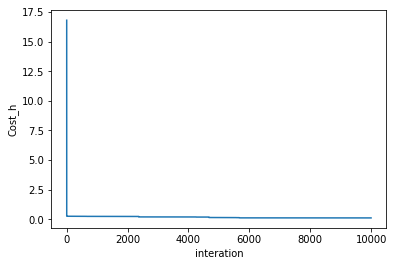

In [140]:
print(clf.W)
plt.plot(clf.history)
plt.ylabel('Cost_h')
plt.xlabel('interation')
plt.show()

In [138]:
originPoint = np.array([0, 0])
data = np.array([[np.random.randint(100), np.random.randint(100), None] for _ in range(100)])

threshold = 70
label = np.array([int(threshold >= np.linalg.norm(d[:2]-originPoint)) for d in data])
data[:, 2] = label

X = data[:, :2]
y = data[:, 2]

p = clf.predict(X)
y = y.astype('int')

accuracy_cnt = [(p[i] == y[i]) for i in range(100)]
print( sum(accuracy_cnt)/len(y) )

0.87


実データ入れてみた

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [120]:
origin_df = pd.read_csv('./data/bank_customers.csv')
df = origin_df.copy()
origin_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [121]:
'''前処理'''
df['education'] = origin_df['education'].map({'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary':3})
df['default'] = origin_df['default'].map({'no': 0, 'yes':1})
df['housing'] = origin_df['housing'].map({'no': 0, 'yes':1})
df['loan'] = origin_df['loan'].map({'no': 0, 'yes':1})

dummy_col = ['job', 'marital', 'contact', 'month', 'poutcome']

In [122]:
shaped_df = pd.concat([df.drop(dummy_col, axis=1), pd.get_dummies(df[dummy_col])], axis=1)
shaped_df.head()

,id,age,education,default,balance,housing,loan,day,duration,campaign,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,39,2,0,1756,1,0,3,939,1,...,0,0,0,0,0,0,0,0,0,1
1,2,51,1,0,1443,0,0,18,172,10,...,0,0,0,0,0,0,0,0,0,1
2,3,36,3,0,436,0,0,13,567,1,...,0,0,0,0,0,0,1,0,0,0
3,4,63,2,0,474,0,0,25,423,1,...,0,0,0,0,0,0,0,0,0,1
4,5,31,3,0,354,0,0,30,502,1,...,0,0,0,0,0,0,0,0,1,0


In [123]:
normalized_shaped_df = (shaped_df - shaped_df.min()) / (shaped_df.max() - shaped_df.min())

In [124]:
normalized_shaped_df.head()

,id,age,education,default,balance,housing,loan,day,duration,campaign,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.000000,0.272727,0.666667,0.0,0.078945,1.0,0.0,0.066667,0.190931,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000037,0.428571,0.333333,0.0,0.076073,0.0,0.0,0.566667,0.034974,0.145161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000074,0.233766,1.000000,0.0,0.066832,0.0,0.0,0.400000,0.115291,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000111,0.584416,0.666667,0.0,0.067181,0.0,0.0,0.800000,0.086011,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000147,0.168831,1.000000,0.0,0.066080,0.0,0.0,0.966667,0.102074,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [125]:
X = normalized_shaped_df.drop(['id', 'y'], axis=1).values
Y = normalized_shaped_df['y'].values

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)

In [126]:
clf = LogisticRegression()

In [127]:
clf.fit(trainX, trainY)

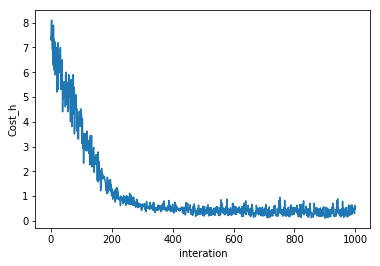

In [128]:
plt.plot(clf.history[:1000])
plt.ylabel('Cost_h')
plt.xlabel('interation')
plt.show()

In [129]:
pred = clf.predict(testX)
sum(pred==testY) / len(testY)

0.8948273743703158

In [130]:
from sklearn.metrics import roc_curve, auc

prob = clf.proba(testX)
fpr, tpr, thresholds = roc_curve(testY, prob)
roc_auc = auc(fpr, tpr)

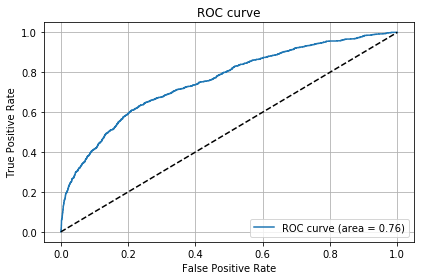

In [131]:
plt.plot(fpr, tpr, label='ROC curve (area = {0:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()